***
# <font color=green size=10>CURSO DE ESTADÍSTICA - PARTE 2</font>
***

# <font color=green>1 CONOCIENDO LOS DATOS</font>
***

## <font color=green>1.1 Dataset del proyecto</font>
***

### Encuesta Nacional por Muestreo de Hogares - 2015

La **Encuesta Nacional por Muestreo de Hogares - ENMH** en Brasil anualmente investiga, de manera permanente, características generales de la población, educación, trabajo, ingresos, vivienda y otras, con frecuencia variables, de acuerdo a las necesidades de información del país, tales como las características de migración, fecundidad, nupcialidad, salud, seguridad alimentaria, entre otros temas. La recopilación de estas estadísticas constituye, durante los 49 años de realización de la investigación, un importante instrumento para la formulación, validación y evaluación de políticas orientadas al desarrollo socioeconómico y la mejora de las condiciones de vida en Brasil.

### Fuente de los Datos

Instituto Brasileño de Geografía y Estadística (IBGE) Encuesta Nacional por Muestreo de Hogares(PNAD) en el 2015

### Variables utilizadas

> ### Ingresos
> ***

Ingresos mensuales del trabajo principal para personas de 10 años o más.

> ### Edad
> ***

Edad del residente en años en la fecha de referencia .

> ### Altura (elaboración propia)
> ***

Altura del habitante en metros.

> ### UF
> ***

Unidad Federal

|Código|Descripción|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descripción|
|---|---|
|0|Masculino|
|1|Femenino|

> ### Años de Estudio
> ***

|Código|Descripción|
|---|---|
|1|Sin educación o menos de 1 año|
|2|1 año|
|3|2 años|
|4|3 años|
|5|4 años|
|6|5 años|
|7|6 años|
|8|7 años|
|9|8 años|
|10|9 años|
|11|10 años|
|12|11 años|
|13|12 años|
|14|13 años|
|15|14 años|
|16|15 años o más|
|17|No determinado|
||No aplica|

> ### Color
> ***

|Código|Descripción|
|---|---|
|0|Indígena|
|2|Blanco|
|4|Negro|
|6|Amarillo|
|8|Pardo|
|9|Sin declarar|

#### <font color='red'>Nota</font>
***
> Se realizaron los siguientes tratamientos sobre los datos originales:
> 1. Se eliminaron los registros en los que **Ingreso** no era válido. (999 999 999 999);
> 2. Se eliminaron los registros en los que **Ingreso** eran missing;
> 3. Solo se consideraron los registros de **Personas de Referencia** de cada hogar (responsable del hogar).

### Importando pandas y leyendo el dataset del proyecto

https://pandas.pydata.org/

In [1]:
import pandas as pd

In [2]:
# mis_datos = "/content/datos.csv"

mis_datos = "https://raw.githubusercontent.com/ivazquez-07/python_data_science_excersises/refs/heads/main/Curso-de-Estadistica-con-Python-Aula-2/datos.csv"

datos = pd.read_csv(mis_datos, encoding='latin-1') # Debido a que una de las columnas tenía un caracter especial, es necesario agregar la codificación

In [3]:
datos.head()

,Ciudad,Sexo,Edad,Color,Años de Estudio,Ingreso,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [4]:
datos.tail()

,Ciudad,Sexo,Edad,Color,Años de Estudio,Ingreso,Altura
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344
76839,53,0,38,8,4,900,1.658305


---
---

# <font color=green>2 DISTRIBUCIONES DE PROBABILIDAD</font>
***

## <font color=red>Problema</font>
***

En una competencia para ocupar un puesto de científico de datos, tenemos un total de **10 preguntas** de opción múltiple con **3 alternativas posibles** en cada pregunta. **Cada pregunta tiene el mismo valor.** Suponga que un candidato decide aventurarse sin haber estudiado nada. Decide hacer la prueba con los ojos vendados y adivinar todas las respuestas. Suponiendo que la prueba **vale 10 puntos y la puntuación de corte es 5**, obtenga la probabilidad de que este candidato **acierte 5 preguntas** y también la probabilidad de que el candidato **pase a la siguiente etapa del proceso de selección**.

## <font color=green>2.1 Distribución Binomial</font>
***

Un evento **binomial** se caracteriza por la posibilidad de que solo ocurran dos categorías. Estas categorías juntas representan todo el espacio muestral, siendo también mutuamente excluyentes, es decir, la ocurrencia de una implica la no ocurrencia de la otra.

En el análisis estadístico, el uso más común de la distribución binomial es para resolver problemas que involucran situaciones de **éxito** y **fracaso**.

# $$P(k)=\binom{n}{k} p^k q^{n-k}$$

Donde:

$p$ = probabilidad de éxito

$q = (1 - p)$ = probabilidad de fracaso

$n$ = número de eventos estudiados

$k$ = número de eventos deseados que tienen éxito

### Experimento Binomial

1. Realización de $n$ pruebas idénticas.

2. Las pruebas son independientes.

3. Solo son posibles dos resultados, por ejemplo: Verdadero o falso; Cara o cruz; Éxito o fracaso.

4. La probabilidad de éxito está representada por $p$ y la probabilidad de fracaso por $1-p = q$. Estas probabilidades no cambian de una prueba para otra.

### Media de la distribución binomial

El valor esperado o la media de la distribución binomial es igual al número de experimentos realizados multiplicado por la probabilidad de que ocurra el evento.

# $$\mu = n \times p$$

### Desviación estándar de la distribución binomial

La desviación estándar es la raíz quadrada del producto entre el número de experimentos, la probabilidad de éxito y la probabilidad de fracaso.

# $$\sigma = \sqrt{n \times p \times q}$$

### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html

In [5]:
from scipy.special import comb

### Combinaciones

El número de combinaciones de $n$ objetos, tomando $k$ cada vez, es:

# $$C_{k}^{n} = \binom{n}{k} = \frac{n!}{k!(n - k)!}$$

Donde

## $$n! = n\times(n-1)\times(n-2)\times...\times(2)\times(1)$$
## $$k! = k\times(k-1)\times(k-2)\times...\times(2)\times(1)$$

Por definición

## $$0! = 1$$

## <font color='blue'>Ejemplo: Mega Sena</font>

En una rueda de lotería Mega Sena tenemos un total de **60 números** para elegir, donde la apuesta mínima es de **seis números**. Usted que es curioso(a) decide calcular la probabilidad de ganar la Mega Sena con solo **un juego**. Para eso necesitamos saber cuántas **combinaciones de seis números se pueden formar con los 60 números disponibles**.

### $$C_{6}^{60} = \binom{60}{6} = \frac{60!}{6!(60 - 6)!}$$

In [6]:
juegos = comb(60, 6)
juegos

np.float64(50063860.0)

In [7]:
probabilidad = 1 / juegos
print(f'La probabilidad de ganar es del {100*probabilidad:0.15f} % en un solo juego')  # Formateo para mostrar los primeros 15 decimales ya que el valor es muy pequeño

La probabilidad de ganar es del 0.000001997448858 % en un solo juego


In [8]:
# Ejercicio:
juegos = comb(25, 20)
juegos
print(f'Las combinaciones posibles son {juegos:.0f}')

probabilidad = 1 / juegos
print(f'La probabilidad de ganar es del {100*probabilidad:0.15f} % en un solo juego')  # Formateo para mostrar los primeros 15 decimales ya que el valor es muy pequeño

Las combinaciones posibles son 53130
La probabilidad de ganar es del 0.001882175795219 % en un solo juego


## <font color='blue'>Ejemplo: Concurso para científico de datos</font>

En una competencia para ocupar un puesto de científico de datos, tenemos un total de **10 preguntas** de opción múltiple con **3 alternativas posibles** en cada pregunta. **Cada pregunta tiene el mismo valor.** Suponga que un candidato decide aventurarse sin haber estudiado nada. Decide tomar la prueba con los ojos vendados y adivinar todas las respuestas. Suponiendo que la prueba **vale 10 puntos y la puntuación de corte es 5**, obtenga la probabilidad de que este candidato **acierte 5 preguntas** y también la probabilidad de que el candidato **pase a la siguiente etapa del proceso de selección**.

### ¿Cuál es la cantidad de pruebas ($n$)?

In [9]:
n = 10
n

10

### ¿Las pruebas son independientes?

Sí. La opción elegida en una pregunta no influye en la opción elegida en otra pregunta.

### ¿Sólo dos resultados son posibles en cada prueba?

Sí. El candidato tiene dos posibilidades, ACERTAR o FALLAR una pregunta.

### ¿Cuál es la probabilidad de éxito ($p$)?

In [10]:
num_alternativas_por_pregunta = 3
p = 1 / num_alternativas_por_pregunta
p

0.3333333333333333

### ¿Cuál es la probabilidad de fracaso ($q$)?

In [11]:
q = 1 - p
q

0.6666666666666667

### ¿Cuál es el número total de eventos para tener éxito ($k$)?

In [12]:
k = 5
k

5

### Solución 1

In [13]:
# P(k) = (n k) * p^k * q^(n-k)
probabilidad = comb(n, k) * p**k * q**(n-k)

print(f'La probabilidad de acertar {k} preguntas de {n} es del {100*probabilidad:0.2f} %')

La probabilidad de acertar 5 preguntas de 10 es del 13.66 %


### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

In [14]:
from scipy.stats import binom

### Solución 2

In [15]:
probabilidad = binom.pmf(k, n, p)

print(f'La probabilidad de acertar {k} preguntas de {n} es del {100*probabilidad:0.2f} %')

La probabilidad de acertar 5 preguntas de 10 es del 13.66 %


### Obtenga la probabilidad de que el candidato apruebe

### $$P(acertar \geq 5) = P(5) + P(6) + P(7) + P(8) + P(9) + P(10)$$

In [16]:
# P(acertar >= 5) = binom.pmf(5, n, p) + ... +binom.pmf(10, n, p)

prob = 0
for k in range(5, 11):
    probabilidad = binom.pmf(k, n, p)
    print(f'La probabilidad de acertar {k} preguntas de {n} es del {100*probabilidad:0.4f} %')
    prob += probabilidad
probabilidad = binom.pmf(k, n, p)

print(f'La probabilidad de acertar mas de 5 preguntas de {n} es del {100*prob:0.4f} %')

La probabilidad de acertar 5 preguntas de 10 es del 13.6565 %
La probabilidad de acertar 6 preguntas de 10 es del 5.6902 %
La probabilidad de acertar 7 preguntas de 10 es del 1.6258 %
La probabilidad de acertar 8 preguntas de 10 es del 0.3048 %
La probabilidad de acertar 9 preguntas de 10 es del 0.0339 %
La probabilidad de acertar 10 preguntas de 10 es del 0.0017 %
La probabilidad de acertar mas de 5 preguntas de 10 es del 21.3128 %


In [17]:
# Más fácil que el for
# o hacer todo esto binom.pmf(5, n, p) + binom.pmf(6, n, p) + binom.pmf(7, n, p) + binom.pmf(8, n, p) + binom.pmf(9, n, p)  + binom.pmf(10, n, p)

prob = binom.pmf(range(5, 11), n, p).sum()
print(f'La probabilidad de acertar mas de 5 preguntas de {n} es del {100*prob:0.4f} %')

La probabilidad de acertar mas de 5 preguntas de 10 es del 21.3128 %


In [18]:
prob = binom.pmf([5,6,7,8,9,10], n, p).sum()
print(f'La probabilidad de acertar mas de 5 preguntas de {n} es del {100*prob:0.4f} %')

La probabilidad de acertar mas de 5 preguntas de 10 es del 21.3128 %


In [19]:
#Otra forma:
prob = 1 - binom.cdf(4, n, p)
print(f'La probabilidad de acertar mas de 5 preguntas de {n} es del {100*prob:0.4f} %')

La probabilidad de acertar mas de 5 preguntas de 10 es del 21.3128 %


In [20]:
#Otra forma:
prob = binom.sf(4, n, p)
print(f'La probabilidad de acertar mas de 5 preguntas de {n} es del {100*prob:0.4f} %')

La probabilidad de acertar mas de 5 preguntas de 10 es del 21.3128 %


#Ejercicio:
09 - Lanzamiento de monedas

Una moneda perfectamente equilibrada se lanza al aire cuatro veces. Usando la distribución binomial, obtenga la probabilidad de que la moneda caiga con la cruz hacia arriba dos veces.

¡Alternativa correcta! Perfecto, tenga en cuenta que la expresión "perfectamente equilibrado" indica que la moneda utilizada es honesta, es decir, tiene la misma probabilidad de obtener cara o cruz. El siguiente código es un ejemplo de una solución:
```
from scipy.stats import binom

p = 1 / 2  # Probabilidad de salir CRUZ
n = 4          # Total de lanzamientos
k = 2          # Total de aciertos (CRUZ hacia arriba)

binom.pmf(k, n, p)
```


In [21]:
binom.pmf(2,4,0.5)

np.float64(0.375)

In [22]:
# Lanzamiento de dados

#Un dado perfectamente equilibrado se lanza hacia arriba diez veces.
#Usando la distribución binomial, obtenga la probabilidad de que los dados caigan
#con el número cinco hacia arriba al menos tres veces.

#1 - binom.cdf(2,10,1/6)

#from scipy.stats import binom

p = 1 / 6   # Probabilidad de salir el número CINCO
n = 10      # Total de lanzamientos

print(f'{binom.sf(2, n, p):.2%}')

22.48%


## <font color='blue'>Ejemplo: Yincana</font>

Una ciudad del interior realiza una yincana cada año para recaudar fondos para el hospital de la ciudad. En la última competencia se sabe que la **proporción de mujeres participantes fue del 60%**. **El número total de equipos, con 12 miembros, inscritos en la yincana de este año es 30**. Con la información anterior, responda: ¿Cuántos equipos deberían estar formados por **8 mujeres**?

### Solución

In [23]:
# Dividimos el ejercicio en dos partes

equipos = 30
miembros = 12
total_personas = equipos * miembros
total_personas


360

In [24]:
p = 0.6
mujeres = p * total_personas
mujeres

216.0

In [25]:
k = 8
n = 12
probabilidad = binom.pmf(k, n, p)

print(f'Probabilidad de formar un equipo con 8 mujeres es del {100*probabilidad:0.2f} %')

Probabilidad de formar un equipo con 8 mujeres es del 21.28 %


In [26]:
# Segunda parte del problema ahora quiero ver cuantos de los 30 equipos los voy a poder formar de esta manera
equipos_8_mujeres = equipos * probabilidad

print(f'Se pueden formar {equipos_8_mujeres:.0f} equipos de 12 personas con 8 mujeres')

Se pueden formar 6 equipos de 12 personas con 8 mujeres


In [27]:
# Ejercicio adicional:
# Suponga que la probabilidad de que una pareja tenga hijos con ojos azules es del 22%.
# En 50 familias, con 3 hijos cada una, ¿cuántas podemos esperar que tengan dos hijos con ojos azules?
p = 0.22
n = 3
k = 2
probabilidad = binom.pmf(k, n, p)

familias_2_hijos = 50 * probabilidad

print(f'Se pueden formar {familias_2_hijos:.2f} familias con 3 hijos con 2 hijos con ojos azules')


### Resultado compartido:
#from scipy.stats import binom

#p = 0.22
#n = 3
#k = 2
#N = 50

#probabilidad = binom.pmf(k, n, p)

#media = probabilidad * N
###


Se pueden formar 5.66 familias con 3 hijos con 2 hijos con ojos azules


---
---

## <font color=red>Problema</font>
***

Un restaurante recibe un promedio de **20 pedidos por hora**. ¿Cuál es la probabilidad de que, en un momento determinado al azar, el restaurante reciba **15 pedidos**?

## <font color=green>2.2 Distribución Poisson</font>
***

Se utiliza para describir el número de ocurrencias en un tiempo o espacio específico. Los eventos se caracterizan por la posibilidad de contar los éxitos, pero no poder contar los fracasos.

Como ejemplos de procesos donde podemos aplicar la distribución de Poisson tenemos la determinación del número de clientes que ingresan a una tienda en un momento determinado, el número de autos que llegan a un Auto-servicio de una cafetería a la hora del almuerzo, la determinación del número de accidentes registrados en un tramo de carretera, etc.

# $$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$

Donde:

$e$ = constante cuyo valor aproximado es 2.718281828459045

$\mu$ = representa el número promedio de ocurrencias en un intervalo de tiempo o espacio dado

$k$ = número de éxitos en el intervalo deseado

### Experimento Poisson

1. La probabilidad de que ocurra es la misma en todo el intervalo observado.

2. El número de ocurrencias en un intervalo dado es independiente del número de ocurrencias en otros intervalos.

3. La probabilidad de que ocurra es la misma en intervalos de igual longitud.

### Media de la distribución Poisson

# $$\mu$$

### Desviación estándar de la distribución Poisson

# $$\sigma = \sqrt{\mu}$$

### Importando bibliotecas

http://www.numpy.org/

In [28]:
import numpy as np

In [29]:
np.e

2.718281828459045

## <font color='blue'>Ejemplo: Delivery</font>

Un restaurante recibe un promedio de **20 pedidos por hora**. ¿Cuál es la probabilidad de que, en un momento determinado al azar, el restaurante reciba **15 pedidos**?

### ¿Cuál es el número promedio de ocurrencias por hora ($\mu$)?

In [30]:
mu = 20 #

### ¿Qué número de ocurrencias queremos obtener en el período ($k$)?

In [31]:
k = 15

### Solución 1

In [32]:
# Por formula
import math
probabilidad = ((np.e ** (-mu)) * (mu**k)) / (math.factorial(k))

print(f'La probabilidad de recibir {k} pedidos es del {100*probabilidad:0.2f} %')

La probabilidad de recibir 15 pedidos es del 5.16 %


### Importando bibliotecas

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

### Solución 2

In [33]:
from scipy.stats import poisson

probabilidad = poisson.pmf(k, mu)

print(f'La probabilidad de recibir {k} pedidos es del {100*probabilidad:0.2f} %')

La probabilidad de recibir 15 pedidos es del 5.16 %


In [34]:
# Ejercicio:

mu = 20
k = 25

probabilidad = poisson.pmf(k, mu)

print(f'La probabilidad de que ingresen {k} clientes en la próxima hora es del {100*probabilidad:0.4} %')

La probabilidad de que ingresen 25 clientes en la próxima hora es del 4.459 %


Lo que aprendimos en esta aula:

Los conceptos básicos de la distribución de probabilidad Poisson
Obtener probabilidades en problemas como los siguientes:

* Determinar la cantidad de clientes que ingresan a una tienda en un momento dado
* Número de autos que llegan al parqueo de un restaurante a la hora del almuerzo
* Determinación del número de accidentes registrados en un tramo de carretera

---
---

## <font color=red>Problema</font>
***

En un estudio sobre la altura de los residentes de una ciudad, se encontró que el conjunto de datos sigue una **distribución aproximadamente normal**, con **media 1.70** y **desviación estándar de 0.1**. Con esta información, obtenga el siguiente conjunto de probabilidades:

> **A.** probabilidad de que una persona, seleccionada al azar, sea menor de 1.80 metros.

> **B.** probabilidad de que una persona, seleccionada al azar, tenga entre 1.60 metros y 1.80 metros.

> **C.** probabilidad de que una persona, seleccionada al azar, tenga más de 1.90 metros.


## <font color=green>2.3 Distribución Normal</font>
***

La distribución normal es una de las más utilizadas en estadística. Es una distribución continua, donde la distribución de frecuencias de una variable cuantitativa tiene forma de campana y es simétrica en relación con su media.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img001.png' width='500px'>

### Características importantes

1. Es simétrica alrededor de la media;

2. El área bajo la curva corresponde a la proporción 1 o 100%;

3. Las medidas de tendencia central (media, mediana y moda) tienen el mismo valor;

4. Los extremos de la curva tienden al infinito en ambas direcciones y, teóricamente, nunca tocan el eje $x$;

5. La desviación estándar define la planitud y el ancho de la distribución. Las curvas más anchas y planas tienen valores de desviación estándar más altos;

6. La distribución se define por su media y desviación estándar;

7. La probabilidad siempre será igual al área bajo la curva, delimitada por los límites superior e inferior.

# $$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Donde:

$x$ = variable normal

$\sigma$ = desviación estándar

$\mu$ = media

La probabilidad se obtiene del área bajo la curva, delimitada por los límites superior e inferior especificados. Se puede ver un ejemplo en la figura siguiente.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img002.png' width='500px'>


Para obtener el área anterior, simplemente calcule la integral de la función para los intervalos determinados. Según la siguiente ecuación:

# $$P(L_i<x<L_s) = \int_{L_i}^{L_s}\frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Donde:

$x$ = variable normal

$\sigma$ = desviación estándar

$\mu$ = media

$L_i$ = límite inferior

$L_s$ = límite superior

### Tablas estandarizadas

Se crearon tablas estandarizadas para facilitar la obtención de los valores de las áreas bajo la curva normal y eliminar la necesidad de resolver integrales definidas.

Para ver los valores en una tabla estandarizada, simplemente transforme nuestra variable en una variable estandarizada $Z$.

Esta variable $Z$ representa la desviación en las desviaciones estándar de un valor de la variable original en relación con la media.

# $$Z = \frac{x-\mu}{\sigma}$$

Donde:

$x$ = variable normal con media $\mu$ y desviación estándar $\sigma$

$\sigma$ = desviación estándar

$\mu$ = media

### Construyendo la tabla normal estandarizada
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [35]:
import pandas as pd
import numpy as np
from scipy.stats import norm

tabla_normal_estandarizada = pd.DataFrame(
    [],
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabla_normal_estandarizada.index:
    for column in tabla_normal_estandarizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabla_normal_estandarizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabla_normal_estandarizada.rename_axis('Z', axis = 'columns', inplace = True)

tabla_normal_estandarizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img003.png' width='250px'>

La tabla anterior proporciona el área bajo la curva entre $-\infty$ y $Z$ desviaciones estándar por encima de la media. Recordando que dado que estos son valores estandarizados, tenemos $\mu = 0$.

## <font color='blue'>Ejemplo: ¿Cuánto mides?</font>

En un estudio sobre la altura de los residentes de una ciudad, se encontró que el conjunto de datos sigue una **distribución aproximadamente normal**, con **media 1.70** y **desviación estándar de 0.1**. Con esta información, obtenga el siguiente conjunto de probabilidades:

> **A.** probabilidad de que una persona, seleccionada al azar, mida menos que 1.80 metros.

> **B.** probabilidad de que una persona, seleccionada al azar, mida entre 1.60 metros y 1.80 metros.

> **C.** probabilidad de que una persona, seleccionada al azar, mida más de 1.90 metros.

### Problema A - Identificación del área bajo la curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img004.png' width='350px'>


### Obtener la variable estandarizada $Z$

In [36]:
media = 1.70
media

1.7

In [37]:
dev_std = 0.1
dev_std

0.1

### Solución 1 - Utilizando la tabla

In [38]:
# Calculo de estandarización:

Z = (1.80 - media) / dev_std
Z

1.0000000000000009

Ahora buscamos este resultado en la tabla de arriba y obtenemos:
0.8413 o sea 84,13%

### Solución 2 - Utilizando Scipy

In [39]:
probabilidad = norm.cdf(Z)
probabilidad = round(probabilidad, 4)
probabilidad

np.float64(0.8413)

### Problema B - Identificación del área bajo la curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img005.png' width='350px'>

### Obtener la variable estandarizada $Z$

In [40]:
Z = (1.70 - media) / dev_std
Z

0.0

In [41]:
Z = (1.80 - media) / dev_std
Z

1.0000000000000009

La solución sería 0.9319 o sea 93,19%

### Solución 1 - Utilizando la tabla

In [42]:
area180 = probabilidad - 0.5

In [43]:
2*area180

np.float64(0.6826000000000001)

### Solución 2 - Utilizando Scipy

In [44]:
z_sup = (1.80 - media) / dev_std
z_sup

#prob1 = norm(media, dev_std).cdf(1.80)
prob1 = norm.cdf(z_sup)
prob1

np.float64(0.8413447460685431)

In [45]:
z_inf = (1.60 - media) / dev_std
z_inf

#prob2 = norm(media, dev_std).cdf(1.60)
prob2 = norm.cdf(z_inf)
prob2

np.float64(0.1586552539314574)

In [46]:
prob_final = prob1 - prob2
prob_final

np.float64(0.6826894921370857)

### Problema C - Identificación del área bajo la curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img006.png' width='350px'>

### Obtener la variable estandarizada $Z$

In [47]:
Z = (1.90 - media) /dev_std
Z

1.9999999999999996

### Solución 1 - Utilizando la tabla

In [48]:
# Resultado según tabla:

probC = 1 - 0.9772 # Valor de arriba es casi 2
probC

0.022800000000000042

### Solución 2 - Utilizando Scipy

In [49]:
prob_c = 1 - norm.cdf(Z)
prob_c

np.float64(0.02275013194817921)

In [50]:
# Ejercicio
media_controlador = 300
desv_std_controlador = 50

z1 = (350 - media_controlador) / desv_std_controlador
z1

z2 = (250 - media_controlador) / desv_std_controlador
z2

prob_c1 = norm.cdf(z1) - norm.cdf(z2)
prob_c1

z1 = (500 - media_controlador) / desv_std_controlador
z1

z2 = (400 - media_controlador) / desv_std_controlador
z2

prob_c2 = norm.cdf(z1) - norm.cdf(z2)
prob_c2

print(f'Las probabilidades del ejercicio son {round(100*prob_c1,2):0.2f}% y {round(100*prob_c2,2):0.2f}%')


Las probabilidades del ejercicio son 68.27% y 2.27%


In [51]:
# Ejercicio
media_lamparas = 720
desv_std_lamparas = 30

z1 = (800 - media_lamparas) / desv_std_lamparas
z1

z2 = (750 - media_lamparas) / desv_std_lamparas
z2

z3 = (700 - media_lamparas) / desv_std_lamparas
z3

z4 = (650 - media_lamparas) / desv_std_lamparas
z4

prob_c1 = norm.cdf(z2) - norm.cdf(z4)
prob_c1

prob_c2 = 1 - norm.cdf(z1)
prob_c2

prob_c3 = norm.cdf(z3)
prob_c3


print(f'Las probabilidades de duración de las lámparas del ejercicio son {round(100*prob_c1,2):0.2f}%, {round(100*prob_c2,2):0.2f}%  y {round(100*prob_c3,2):0.2f}%')


Las probabilidades de duración de las lámparas del ejercicio son 83.15%, 0.38%  y 25.25%


In [52]:
# Ejercicio de Calculo de probabilidades

# 1)
prob1 = norm.cdf(1.96)

# 2)
prob2 = 1 - norm.cdf(2.15)

# 3)
prob3 = norm.cdf(-0.78)

# 4)
prob4 = 1 - norm.cdf(0.59)

print(f'Las probabilidades del ejercicio son {round(100*prob1,2):0.2f}%, {round(100*prob2,2):0.2f}%, {round(100*prob3,2):0.2f}% y {round(100*prob4,2):0.2f}%')

Las probabilidades del ejercicio son 97.50%, 1.58%, 21.77% y 27.76%


# <font color=green>3 MUESTREO</font>
***

## <font color=green>3.1 Población y Muestra</font>
***

### Población
Conjunto de todos los elementos de interés de un estudio. Varios elementos pueden componer una población, por ejemplo: personas, edades, alturas, automóviles, etc.

En cuanto al tamaño, las poblaciones pueden ser limitadas (poblaciones finitas) o ilimitadas (poblaciones infinitas).

### Poblaciones finitas

Permiten el recuento de sus elementos. Los ejemplos incluyen el número de empleados en una empresa, el número de estudiantes en una escuela, etc.

### Poblaciones infinitas

No es posible contar sus elementos. Como ejemplos tenemos el número de porciones que se pueden extraer del agua del mar para su análisis, la temperatura medida en cada punto de un territorio, etc.

<font color=red>Cuando se pueden contar los elementos de una población, pero presentando una cantidad muy grande, se supone que la población es infinita.</font>

### Muestra
Subconjunto representativo de la población.

Los atributos numéricos de una población, como su media, varianza y desviación estándar, se conocen como **parámetros**. El enfoque principal de la inferencia estadística es precisamente generar estimaciones y probar hipótesis sobre parámetros poblacionales utilizando información de la muestra.

## <font color=green>3.2 ¿Cuándo usar una muestra?</font>
***

### Poblaciones infinitas

El estudio nunca llegaría a su fin. No es posible investigar todos los elementos de la población.

### Pruebas destructivas

Estudios donde los elementos evaluados son totalmente consumidos o destruidos. Ejemplo: pruebas de vida útil, pruebas de seguridad en accidentes de tráfico.

### Resultados rápidos

Investigaciones que necesitan más agilidad en la difusión. Ejemplo: encuestas de opinión, encuestas sobre problemas de salud pública.

### Altos precios

Cuando la población es finita pero muy grande, el costo de un censo puede hacer inviable el proceso.

## <font color=green>3.3 Muestreo Aleatorio Simple</font>
***

Es una de las principales formas de extraer una muestra de una población. El requisito fundamental de este tipo de enfoque es que cada elemento de la población tenga las mismas posibilidades de ser seleccionado para formar parte de la muestra.

In [53]:
datos.shape[0]

76840

In [54]:
datos.Ingreso.mean()

np.float64(2000.3831988547631)

In [55]:
muestra = datos.sample(n = 1000, random_state=101)  # Usamos el parámetro random_state, que es la semilla para el generador de números aleatorios (utilícelo si desea repetir el proceso y mantener la misma muestra seleccionada).

muestra.shape[0]

1000

In [56]:
muestra.Ingreso.mean()

np.float64(1998.783)

In [57]:
datos.Sexo.value_counts(normalize = True)

,proportion
Sexo,
0,0.692998
1,0.307002


In [58]:
muestra.Sexo.value_counts(normalize = True) # Las proporciones de la muestra se mantienen respecto a la población por lo tanto podemos hablar de una muestra representativa

,proportion
Sexo,
0,0.706
1,0.294


## <font color=green>3.4 Muestreo Estratificado</font>
***

Es una mejora del proceso de muestreo aleatorio simple. En este método, se propone dividir la población en subgrupos de elementos con características similares, es decir, grupos más homogéneos. Con estos subgrupos separados, la técnica de muestreo aleatorio simple dentro de cada subgrupo se aplica individualmente.

## <font color=green>3.5 Muestreo por Conglomerados</font>
***

También tiene como objetivo mejorar el criterio de muestreo aleatorio simple. En el muestreo por conglomerados también se crean subgrupos, pero no serán homogéneos como en el muestreo estratificado. En el muestreo por conglomerados los subgrupos serán heterogéneos, donde luego se aplicará un muestreo aleatorio simple o estratificado.

Un ejemplo muy común de la aplicación de este tipo de técnica es la división de la población en grupos territoriales, donde los elementos investigados tendrán características bastante variadas.

# <font color=green>4 ESTIMACIÓN</font>
***

## <font color='red'>Problema </font>

Suponga que los pesos de las bolsas de arroz de una industria alimentaria se distribuyen aproximadamente como una distribución normal **desviación estándar igual a 150 g**. Se seleccionó una **muestra aleatoria de 20 bolsas** de un lote específico, se obtuvo un **peso promedio de 5.050 g**. Construya un **intervalo de confianza para la media de la población** asumiendo un **nivel de significancia del 5%**.

---

Es la forma de hacer suposiciones generalizadas sobre los parámetros de una población a partir de información de una muestra.

- **Los parámetros** son los atributos numéricos de una población, como la media, la desviación estándar, etc.

- **Estimación** es el valor obtenido para un parámetro dado a partir de los datos de una muestra de la población.

## <font color=green>4.1 Teorema central del límite</font>
***

> El **Teorema Central del Límite** establece que, con el aumento del tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho está asegurado para $n$ mayores o iguales a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

La desviación estándar de las medias muestrales se conoce como **error estándar de la media**

### Entendiendo el Teorema Central del Límite

In [59]:
n = 2000
total_de_muestras = 1500


In [60]:
muestras = pd.DataFrame()
muestras

""


In [61]:
for i in range (total_de_muestras):
  _ = datos.Edad.sample(n)                      # Usando el guión bajo no se guarda en ningún lado (solo en memoria)
  _.index = range(0, len(_))
  muestras['Muestra_'+ str(i)] = _

muestras

/tmp/ipython-input-61-2979312481.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_'+ str(i)] = _
/tmp/ipython-input-61-2979312481.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestras['Muestra_'+ str(i)] = _
/tmp/ipython-input-61-2979312481.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfram

,Muestra_0,Muestra_1,Muestra_2,Muestra_3,Muestra_4,Muestra_5,Muestra_6,Muestra_7,Muestra_8,Muestra_9,...,Muestra_1490,Muestra_1491,Muestra_1492,Muestra_1493,Muestra_1494,Muestra_1495,Muestra_1496,Muestra_1497,Muestra_1498,Muestra_1499
0,65,80,61,48,72,52,49,70,35,47,...,49,48,44,37,22,50,29,49,35,68
1,54,54,31,23,37,31,42,22,32,59,...,26,33,44,43,35,37,35,28,51,31
2,67,45,22,21,50,60,31,30,21,53,...,30,53,48,35,35,39,56,31,47,45
3,38,24,61,73,30,59,47,66,51,29,...,54,36,52,56,40,36,58,48,60,28
4,65,53,29,31,69,50,67,42,23,53,...,40,42,38,30,35,28,24,69,50,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,35,36,47,56,61,39,33,63,35,42,...,47,60,33,35,60,75,31,51,23,57
1996,44,19,43,51,28,30,39,53,51,43,...,60,66,43,37,24,39,40,33,56,56
1997,33,60,37,65,59,44,29,22,42,35,...,54,42,54,59,43,42,31,66,45,51
1998,51,54,44,32,40,39,42,26,40,63,...,28,37,52,47,41,39,44,63,36,53


In [62]:
muestras.shape   # Filas x Columnas

(2000, 1500)

In [63]:
muestras.mean()

,0
Muestra_0,44.0655
Muestra_1,44.3395
Muestra_2,44.1795
Muestra_3,44.0010
Muestra_4,44.6180
...,...
Muestra_1495,44.1900
Muestra_1496,43.6990
Muestra_1497,44.2860
Muestra_1498,43.9440


<Axes: >

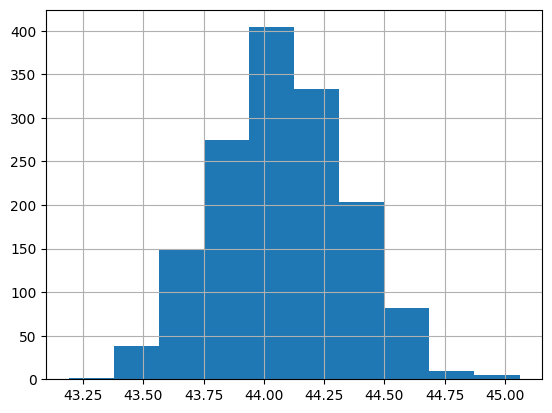

In [64]:
muestras.mean().hist()

In [65]:
datos.Edad.mean()

np.float64(44.07142113482561)

> El **Teorema Central del Límite** establece que, con el aumento del tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho está asegurado para $n$ mayores o iguales a 30.

In [66]:
muestras.mean().mean()

np.float64(44.07445233333334)

> El **Teorema Central del Límite** establece que, con el aumento del tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho está asegurado para $n$ mayores o iguales a 30.

> El **Teorema Central del Límite** establece que, con el aumento del tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho está asegurado para $n$ mayores o iguales a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

In [67]:
muestras.mean().std()

0.27402535252011134

In [68]:
datos.Edad.std()

12.480583465360187

In [69]:
datos.Edad.std() / np.sqrt(n)

np.float64(0.2790743302740527)

## <font color=green>4.2 Los niveles de confianza y significación</font>
***

El **nivel de confianza** ($1 - \alpha$) representa la probabilidad de que la estimación sea correcta. Además, el **nivel de significancia** ($\alpha$) expresa la probabilidad de error de la estimación.

El **nivel de confianza** representa el grado de confiabilidad del resultado estimado dentro de un cierto rango. Cuando establecemos un **nivel de confianza del 95%** en una encuesta, por ejemplo, estamos asumiendo que existe una probabilidad del 95% de que los resultados de la encuesta representen bien la realidad, es decir, sean correctos.

El **nivel de confianza** de una estimación se puede obtener del área bajo la curva normal como se muestra en la figura siguiente.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img007.png' width='450px'>


## <font color=green>4.3 Error inferencial</font>
***

El **error inferencial** se define por la **desviación estándar de las medias muestrales** $\sigma_\bar{x}$ y por el **nivel de confianza** determinado para el proceso.

# $$e = z \frac{\sigma}{\sqrt{n}}$$

Para estimar la cantidad media gastada por cada cliente de una gran cadena de comida rápida, se seleccionó una muestra de 50 clientes.

Suponiendo que el valor de la desviación estándar de la población es de $ 6,00 y que esta población se distribuye normalmente, obtenga el margen de error de esta estimación para un nivel de confianza del 95%.

In [70]:
n = 50
dev_std_pob = 6.0
confianza = 0.95
z = 1.96
e = z * (dev_std_pob / np.sqrt(n))
e

np.float64(1.6631151493507597)

¡Alternativa correcta! El siguiente código sirve como ejemplo para resolver este problema:

```
# Código
from scipy.stats import norm
import numpy as np

z = norm.ppf(0.975)

desviacion_estandar = 6

n = 50

e = z * (desviacion_estandar / np.sqrt(n))

print(f"$ {e:0.2f}")
```


## <font color=green>4.4 Intervalos de confianza</font>
***

### Intervalo de confianza para la media poblacional

#### Con desviación estándar poblacional conocida

## $$\mu = \bar{x} \pm z\frac{\sigma}{\sqrt{n}}$$

#### Con desviación estándar de población desconocida

## $$\mu = \bar{x} \pm z\frac{s}{\sqrt{n}}$$

## <font color='blue'>Ejemplo: </font>

Suponga que los pesos de las bolsas de arroz de una industria alimentaria se distribuyen aproximadamente como una población normal con **desviación estándar igual a 150 g**. Se seleccionó una **muestra aleatoria de 20 bolsas** de un lote específico, se obtuvo un **peso promedio de 5.050 g**. Construya un intervalo de confianza para el **promedio de la población** asumiendo un **nivel de significancia del 5%**.

### Media muestral

In [71]:
media_muestra = 5050
media_muestra

5050

### Nivel de significancia ($\alpha$)

In [72]:
significancia = 0.05

In [73]:
significancia

0.05

### Nivel de confianza ($1 - \alpha$)

In [74]:
confianza = 1 - significancia

### Obteniendo $z$

In [75]:
tabla_normal_estandarizada[12:26]

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
1.20,0.8849,0.8869,0.8888,0.8907,0.8925,0.8944,0.8962,0.8980,0.8997,0.9015
1.30,0.9032,0.9049,0.9066,0.9082,0.9099,0.9115,0.9131,0.9147,0.9162,0.9177
1.40,0.9192,0.9207,0.9222,0.9236,0.9251,0.9265,0.9279,0.9292,0.9306,0.9319
1.50,0.9332,0.9345,0.9357,0.9370,0.9382,0.9394,0.9406,0.9418,0.9429,0.9441
1.60,0.9452,0.9463,0.9474,0.9484,0.9495,0.9505,0.9515,0.9525,0.9535,0.9545
1.70,0.9554,0.9564,0.9573,0.9582,0.9591,0.9599,0.9608,0.9616,0.9625,0.9633
1.80,0.9641,0.9649,0.9656,0.9664,0.9671,0.9678,0.9686,0.9693,0.9699,0.9706
1.90,0.9713,0.9719,0.9726,0.9732,0.9738,0.9744,0.9750,0.9756,0.9761,0.9767
2.00,0.9772,0.9778,0.9783,0.9788,0.9793,0.9798,0.9803,0.9808,0.9812,0.9817
2.10,0.9821,0.9826,0.9830,0.9834,0.9838,0.9842,0.9846,0.9850,0.9854,0.9857


### Obteniendo $z$

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img008.png' width='450px'>

In [76]:
probabilidad_media = 0.95 / 2
probabilidad_media

0.475

In [77]:
area_superior = 0.5 + probabilidad_media
area_superior  # Lo buscamos en la tabla (adentro) y obtenemos 1.90 + 0.06  = z_sup = 1.96

0.975

In [78]:
z = norm.ppf(area_superior)
z

np.float64(1.959963984540054)

### Valores de $z$ para los niveles de confianza más utilizados

|Nivel de<br>confianza|Valor del área bajo<br>la curva normal| $z$ |
|:----------------:|:---------------------------------:|:---:|
|90%               |0.95                               |1.645|
|95%               |0.975                              |1.96 |
|99%               |0.995                              |2.575|

### Obteniendo $\sigma_\bar{x}$

In [79]:
dev_std_poblacional = 150
dev_std_poblacional

150

In [80]:
n = 20
n

20

In [81]:
raiz_n = np.sqrt(n)
raiz_n

np.float64(4.47213595499958)

In [82]:
sigma = dev_std_poblacional / raiz_n
sigma

np.float64(33.54101966249684)

### Obteniendo $e$

In [83]:
e = z * sigma
e

np.float64(65.73919054324361)

### Solución 1 - Calculando el intervalo de confianza para la media

In [84]:
# Calculo manual
intervalo = (
    media_muestra - e,
    media_muestra + e
)
intervalo # El peso de los sacos de arroz está en el intervalo de confianza del 95% entre estos dos valores


(np.float64(4984.260809456757), np.float64(5115.739190543243))

### Solución 2 - Calculando el intervalo de confianza para la media

In [85]:
norm.interval(confidence=0.95, loc= media_muestra, scale= sigma) # En el video "confidence" estaba definido como alpha (seguramente una versión anterior)

(np.float64(4984.260809456757), np.float64(5115.739190543243))

# <font color=green>5 CÁLCULO DEL TAMAÑO DE LA MUESTRA</font>
***

## <font color='red'>Problema </font>

Estamos estudiando los ingresos mensuales de los jefes de hogar con ingresos de hasta R$\$$ 5.000,00 en Brasil. Nuestro supervisor determinó que el **error máximo en relación a la media es de R$\$$ 10,00**. Sabemos que la **desviación estándar poblacional** de este grupo de trabajadores es **R$\$$ 1.082,79**. Para un **nivel de confianza del 95%**, ¿cuál debería ser el tamaño de la muestra de nuestro estudio?

## <font color=green>5.1 Variables cuantitativas y población infinita</font>
***

# $$e = z \frac{\sigma}{\sqrt{n}}$$

#### Con desviación estándar conocida

## $$n = \left(z\frac{\sigma}{e}\right)^2$$

#### Con desviación estándar desconocida

## $$n = \left(z\frac{s}{e}\right)^2$$

Donde:

$z$ = variable normal estandarizada

$\sigma$ = desviación estándar poblacional

$s$ = desviación estándar de la muestra

$e$ = error inferencial

### <font color='red'>Comentarios</font>

1. La desviación estándar ($\sigma$ o $s$) y el error ($e$) deben estar en la misma unidad de medida.

2. Cuando el error ($e$) se representa en términos porcentuales, debe interpretarse como un porcentaje relacionado con el promedio.

## <font color='blue'>Ejemplo: Rendimiento medio</font>

Estamos estudiando los ingresos mensuales de los jefes de hogar. Nuestro supervisor determinó que el **error máximo en relación a la media es de $\$$ 100,00** pesos. Sabemos que la **desviación estándar poblacional** de este grupo de trabajadores es **$\$$ 3.323,39** pesos. Para un **nivel de confianza del 95%**, ¿cuál debería ser el tamaño de la muestra de nuestro estudio?

In [86]:
error_maximo = 100.0
error_maximo

100.0

In [87]:
dev_std_poblacional = 3323.39
dev_std_poblacional

3323.39

In [88]:
confianza = 0.95

# Entonces
# Segun la tabla z = 1.96

z = norm.ppf(0.975)
z


np.float64(1.959963984540054)

### Obteniendo $\sigma$

In [89]:
sigma = error_maximo / z
sigma

np.float64(51.021345692465395)

### Obteniendo $e$

In [90]:
e = z * sigma
e

np.float64(100.0)

### Obteniendo $n$

In [91]:
n = (z * dev_std_poblacional / e) ** 2
n

np.float64(4242.860955311813)

In [92]:
int(n.round())
## Elementos para garantizar que la muestra será representativa de la población

4243

# Ejercicio:

El valor promedio gastado por los clientes en una tienda es de \$45,50. Suponiendo que la desviación estándar de los gastos es de \$15,00, ¿cuál debería ser el tamaño de la muestra para estimar la media de la población con un nivel de significancia del 10%?

Tenga en cuenta que el error máximo aceptable es del 10%.


Nivel de confianza	Valor del área bajo
la curva normal	 z


---


90%	0.95	1.645

95%	0.975	1.96

99%	0.995	2.575

In [93]:
significancia = 0.1
confianza = 1 - significancia


z = norm.ppf(0.95) # 10%
z

desv_std_tienda = 15.00

sigma = z * desv_std_tienda
sigma

error_maximo = 45.50 * 0.1
error_maximo

n = (z * desv_std_tienda / error_maximo) ** 2
int(n.round())

29

#Resultado:

¡Alternativa correcta! Aquí está el código de la solución:

```
from scipy.stats import norm

media = 45.5
sigma = 15
significancia = 0.10
confianza = 1 - significancia

z = norm.ppf(0.5 + (confianza / 2))
error_porcentual = 0.10
e = media * error_porcentual

n = (z * (sigma / e)) ** 2
n.round()
```





---
---

## <font color='red'>Problema</font>

En un lote de **10 000 latas** de gaseosa, se realizó una muestra aleatoria simple de **100 latas** y se obtuvo que la **desviación estándar muestral del contenido de las latas es igual a 12 ml**. El fabricante estipula un **error máximo en la media poblacional de solo 5 ml**. Para garantizar un **nivel de confianza del 95%**, ¿qué tamaño de muestra se debe seleccionar para este estudio?

## <font color=green>5.2 Variables cuantitativas y población finita</font>
***

#### Con desviación estándar conocida

## $$n = \frac{z^2 \sigma^2 N}{z^2 \sigma^2 + e^2(N-1)}$$

#### Con desviación estándar desconocida

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

Donde:

$N$ = tamaño de la población

$z$ = variable normal estandarizada

$\sigma$ = desviación estándar poblacional

$s$ = desviación estándar muestral

$e$ = error inferencial

## <font color='blue'>Ejemplo: Industria de refrescos</font>

En un lote de **10 000 latas** de gaseosa, se realizó una muestra aleatoria simple de **100 latas** y se obtuvo que la **desviación estándar muestral del contenido de las latas es igual a 12 ml**. El fabricante estipula un **error máximo en la media poblacional de solo 5 ml**. Para garantizar un **nivel de confianza del 95%**, ¿qué tamaño de muestra se debe seleccionar para este estudio?

### Obteniendo $N$

In [94]:
N = 10000
N

10000

### Obteniendo $z$

In [95]:
z = norm.ppf(0.975)
z

np.float64(1.959963984540054)

### Obteniendo $s$

In [96]:
s = 12
s

12

### Obteniendo $e$

In [97]:
e = 5
e

5

### Obteniendo $n$

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

In [98]:
n = ((z**2) * (s**2) * (N)) / (((z**2) * (s**2)) + ((e**2) * (N-1)))
int(n.round())

22

# Ejercicio:

Un fabricante de harina encontró que, en una muestra aleatoria compuesta por 200 sacos de 25 kg de un lote compuesto por 2000 sacos, mostraba una desviación estándar muestral del peso igual a 480 g.

Considerando un error máximo asociado con el promedio poblacional de 0.3 kg y un nivel de confianza del 95%, ¿qué tamaño de muestra debe seleccionarse para obtener una estimación confiable del parámetro poblacional?

In [99]:
N = 2000
N

2000

In [100]:
z = norm.ppf(0.975)
z

np.float64(1.959963984540054)

In [101]:
e = 0.3
e

0.3

In [102]:
s = 0.48
s

0.48

In [103]:
n = ((z**2) * (s**2) * (N)) / (((z**2) * (s**2)) + ((e**2) * (N-1)))
int(n.round())

10

Aproximadamente 10 bolsas


¡Alternativa correcta! Siempre recordando comprobar las unidades de medida de error, media y desviación estándar. Aquí está el código propuesto para la solución:

```
from scipy.stats import norm

N = 2000
z = norm.ppf(0.5 + (0.95 / 2))
s = 480
e = 0.3 * 1000   # Convirtiendo kg para g

n = ((z**2) * (s**2) * (N)) / (((z**2) * (s**2)) + ((e**2) * (N - 1)))
int(n.round())
```



# <font color=green>6 FIJANDO EL CONTENIDO</font>
***

## <font color='blue'>Ejemplo: Rendimiento medio</font>

Estamos estudiando **los ingresos mensuales de los jefes de hogar con ingresos de hasta R$\$$ 5.000,00 en Brasil**. Nuestro supervisor determinó que el **error máximo en relación a la media es de R$\$$ 10,00**. Sabemos que la **desviación estándar poblacional** de este grupo de trabajadores es **R$\$$ 1.082,79** y que la **media poblacional** es **R$\$$ 1.426,54**. Para un **nivel de confianza del 95%**, ¿cuál debería ser el tamaño de la muestra de nuestro estudio? ¿Cuál es el intervalo de confianza para la media considerando el tamaño de muestra obtenido?

### Construyendo el conjunto de datos según lo especificado por el problema

In [110]:
z = norm.ppf(0.975)
z

np.float64(1.959963984540054)

In [111]:
e = 10
e

10

In [112]:
ingresos_5000 = datos.query('Ingreso <= 5000').Ingreso
ingresos_5000

,Ingreso
0,800
1,1150
2,880
3,3500
4,150
...,...
76835,812
76836,1500
76837,1300
76838,1500


In [113]:
media = ingresos_5000.mean()
media

np.float64(1426.5372144947232)

In [114]:
sigma = ingresos_5000.std()
sigma

1082.794549030635

### Calcular el tamaño de la muestra

In [118]:
n = (z * (sigma / e)) ** 2
n = int(n.round())
n

45039

### Calcular el intervalo de confianza para la media

In [120]:
intervalo = norm.interval(confidence = 0.95,
                          loc = media,
                          scale = sigma / np.sqrt(n))
intervalo

(np.float64(1416.5372195108241), np.float64(1436.5372094786223))

### Realización de una prueba gráfica

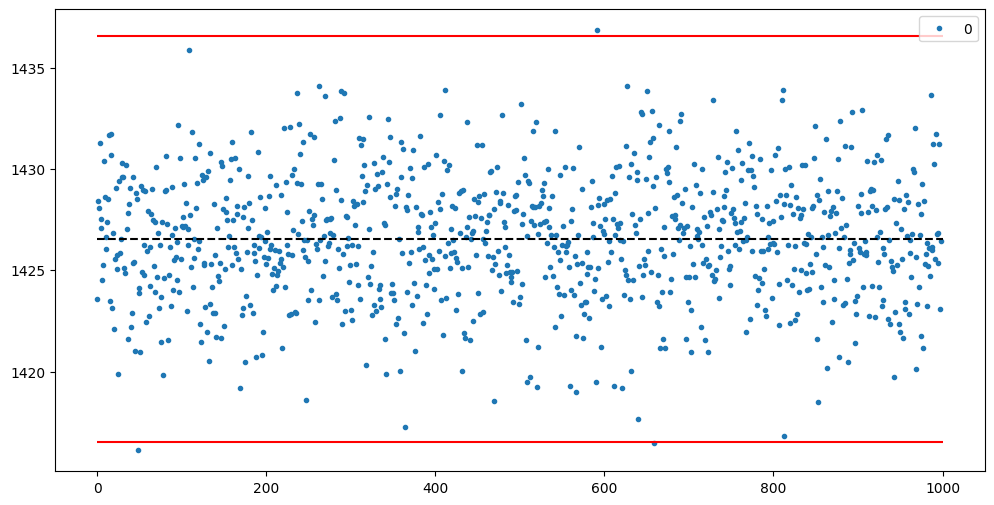

In [138]:
# Número de simulaciones
n_simulaciones = 1000

# Tamaño de la muestra en cada simulación
#tamano_muestra = n

# Lista para almacenar las medias de cada simulación
medias = []
# Realizar las simulaciones
medias = [ingresos_5000.sample(n = n).mean() for i in range(1, n_simulaciones)]

# Crear un DataFrame con las medias
medias = pd.DataFrame(medias)
# Gráfico de las medias y el intervalo de confianza
import matplotlib.pyplot as plt

ax = medias.plot(style = '.')
ax.figure.set_size_inches(12, 6)
ax.hlines(y = media, xmin=0, xmax = n_simulaciones, color='black', linestyle='--', label='Media Poblacional')
ax.hlines(y = intervalo[0], xmin=0, xmax = n_simulaciones, color='red', linestyle='-', label='Límite Inferior del Intervalo')
ax.hlines(y = intervalo[1], xmin=0, xmax = n_simulaciones, color='red', linestyle='-', label='Límite Superior del Intervalo')

Ejercicios:

Una muestra aleatoria simple de 1976 elementos de una población distribuida normalmente, con una desviación estándar de 11, dio como resultado una media muestral de 28.

¿Cuál es el intervalo de confianza del 90% para la media de la población?

In [104]:
muestras = 1976
devStd = 11
media_muestral = 28

confianza = 0.9

sigma = devStd / np.sqrt(muestras)
sigma

np.float64(0.24745669886621613)

In [105]:
prob_media = confianza / 2
prob_media

0.45

In [106]:
z = norm.ppf(0.5 + (confianza / 2))
z

np.float64(1.6448536269514722)

In [107]:
e = z * sigma
e

np.float64(0.40703004864353387)

In [108]:
intervalo = (
    media_muestral - e,
    media_muestral + e
)
intervalo

(np.float64(27.592969951356466), np.float64(28.407030048643534))

¡Alternativa correcta! Aquí está el código de sugerencia de solución:

In [109]:
from scipy.stats import norm
import numpy as np

media_muestral = 28
desviacion_estandar = 11
n = 1976

norm.interval(confidence = 0.90,
              loc = media_muestral,
              scale = desviacion_estandar / np.sqrt(n))

(np.float64(27.592969951356466), np.float64(28.407030048643534))